In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np

import os
sys.path.insert(0, os.path.abspath(''))

from hydroml.libs.model import BaryonModel
from hydroml.libs.traindataset import TrainDataset

from torch.utils.data import DataLoader

from torch import nn

import torch

In [2]:
batch_size = 64
ngpu = 0
# Epochs set to '1' for testing
epochs = 2000
learning_rate = 1e-4
beta1 = 0.001
n_samples = 20000

In [3]:
# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [4]:
net_Baryons = np.fromfile('../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.2_wBulk_22momdeltaf_netBaryon.dat', dtype=np.float32)

net_Protons = np.fromfile('../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.2_wBulk_22momdeltaf_netProton.dat', dtype=np.float32)

dataset = TrainDataset(net_Baryons, net_Protons, 141)

data_loader = DataLoader(
    dataset=dataset,
    batch_size=batch_size,
    shuffle=True,
)

In [5]:
model = BaryonModel()

In [6]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)#, betas=(beta1, 0.999))

In [7]:
loss_func = nn.MSELoss()

IndexError: list index out of range

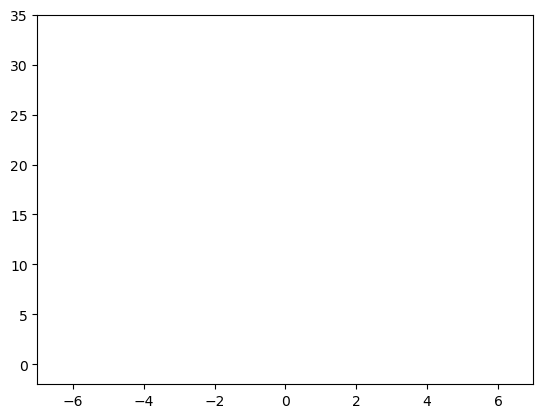

In [8]:
from matplotlib.animation import PillowWriter
from hydroml.libs.plot import plot_output

fig = plt.figure()
o, = plt.plot([], [], 'k-')
m, = plt.plot([], [], 'k-')

plt.xlim(-7, 7)
plt.ylim(-2, 35)

meta = dict(title="Movie", artist="No one")
writer = PillowWriter(fps=25, metadata=meta)

with writer.saving(fig, "training.gif", 100):
    for epoch in range(epochs):
        for i, data in enumerate(data_loader):
            keys = data[0]
            values = data[1]

            output = model(keys)

            loss = loss_func(output, values)

            optimizer.zero_grad()

            loss.backward()
            optimizer.step()

            # o.set_data(dataset.eta, values[0].numpy().flatten())
            # m.set_data(dataset.eta, output.detach().numpy()[0].flatten())
            #
            # #writer.grab_frame()
            #
            # if (epoch%10 == 0):
            #     #if loss < 0.01:
            #         #plot_output(dataset.eta, output.detach().numpy()[0], values[0])
            #     print(loss)
            #     print(epoch)

In [9]:
torch.save(model, '../models/test_19_4.pt')